In [117]:
from text2vec0 import text2vec
import numpy as np

In [118]:
import matplotlib.pyplot as plt
from matplotlib import style

In [119]:
from sklearn.utils.linear_assignment_ import linear_assignment
from sklearn.cluster import KMeans

In [120]:
def embedding_graph(X, y_predict):
    style.use("ggplot")
    N = 50
    colors = np.random.rand(N)
    color_list = [colors[y] for y in y_predict]

    from sklearn.manifold import TSNE
    tsne = TSNE(n_components=3).fit(X)
    X_embedded = tsne.fit_transform(X)

    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color_list, s=10, cmap='viridis')
    plt.show()

In [121]:
from sklearn.mixture import GaussianMixture

def predict(X):
    kmeans = KMeans(n_clusters=20, random_state=0).fit(X)
    y_predict = kmeans.predict(X)
    
#     from sklearn.mixture import GaussianMixture

#     gmm = GaussianMixture(
#             n_components=2, covariance_type='diag').fit(X)

#     y_predict = gmm.predict(X)

    return y_predict

def accuracy(y_predict, Y):
    y_true=np.array(Y)
    assert y_predict.size == y_true.size

    D = max(y_predict.max(), y_true.max())+1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(y_predict.size):
        w[y_predict[i], y_true[i]] += 1

    ind = linear_assignment(w.max() - w)
    accuracy = sum([w[i, j] for i, j in ind])*1.0/y_predict.size, w
    return accuracy[0]

In [123]:
import pandas as pd

df = pd.read_pickle("obesity_concat_vertical.pkl")
    
abstract= df["text"]
labels = df['label']

Y = df['class']

In [124]:
df.drop("patent_id", axis = 1, inplace = True)

In [125]:
df.to_pickle("obesity_text_vertical_without_id.pkl")

In [126]:
labels.unique()

array(['0_title', '1_title', '2_title', '3_title', '4_title', '5_title',
       '6_title', '7_title', '8_title', '9_title', '10_title', '11_title',
       '12_title', '13_title', '14_title', '15_title', '16_title',
       '17_title', '18_title', '19_title', '20_title', '21_title',
       '22_title', '23_title', '24_title', '25_title', '26_title',
       '27_title', '28_title', '29_title', '30_title', '31_title',
       '32_title', '33_title', '34_title', '35_title', '36_title',
       '37_title', '38_title', '39_title', '40_title', '41_title',
       '42_title', '43_title', '44_title', '45_title', '46_title',
       '47_title', '48_title', '49_title', '50_title', '51_title',
       '52_title', '53_title', '54_title', '55_title', '56_title',
       '57_title', '58_title', '59_title', '60_title', '61_title',
       '62_title', '63_title', '64_title', '65_title', '66_title',
       '67_title', '68_title', '69_title', '70_title', '71_title',
       '72_title', '73_title', '74_title', '75_t

In [127]:
def get_top_score(X, iteration=20):
    top_score = 0
    for _ in range(iteration):
        y_predict = predict(X)
        score = accuracy(y_predict, labels)
        if top_score < score:
            top_score = score
    return top_score

### abstract doc2vec

In [148]:
from importlib import reload
import text2vec0
reload(text2vec0)
from text2vec0 import text2vec

In [149]:
abstract2vec = text2vec(filename='obesity_concat_vertical.pkl', class_name='obesity_doc2vec', model='doc2vec', n_dim=100, )

In [150]:
obesity_df = pd.read_pickle('obesity_concat_vertical.pkl')

In [151]:
obesity_df.label

0        0_title
1        1_title
2        2_title
3        3_title
4        4_title
5        5_title
6        6_title
7        7_title
8        8_title
9        9_title
10      10_title
11      11_title
12      12_title
13      13_title
14      14_title
15      15_title
16      16_title
17      17_title
18      18_title
19      19_title
20      20_title
21      21_title
22      22_title
23      23_title
24      24_title
25      25_title
26      26_title
27      27_title
28      28_title
29      29_title
         ...    
414    118_claim
415    119_claim
416    120_claim
417    121_claim
418    122_claim
419    123_claim
420    124_claim
421    125_claim
422    126_claim
423    127_claim
424    128_claim
425    129_claim
426    130_claim
427    131_claim
428    132_claim
429    133_claim
430    134_claim
431    135_claim
432    136_claim
433    137_claim
434    138_claim
435    139_claim
436    140_claim
437    141_claim
438    142_claim
439    143_claim
440    144_claim
441    145_cla

In [152]:
model, X = abstract2vec.train_doc2vec()

/home/kimjihee/miniconda3/envs/ml_python/lib/python3.5/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [163]:

model.docvecs.save("obesity_doc2vec")

gensim.models.keyedvectors.Doc2VecKeyedVectors

In [176]:
title = X[0:148 ]
abstract = X[148:296]
claim = X[296:]

In [177]:
len(claim)

148

In [155]:
len(X), len(X[0])

(444, 100)

In [180]:
np.save("claim_obesity.npy",claim)

In [32]:
c=np.load("obesity_doc2vec.npy")

In [46]:
w=X.wv

/home/kimjihee/miniconda3/envs/ml_python/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [65]:
def clean_text(filename):
    import re
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    import string
    df = pd.read_pickle(filename)
    abstract = df["abstract"]
    labels = df.patent_id
        
    re_punc = re.compile("[%s]" % re.escape(string.punctuation))
    text_concat = [re_punc.sub("", text.lower()) for text in abstract]

    stop_words = set(stopwords.words('english'))
    word_tokens = [word_tokenize(text) for text in text_concat]

    filtered_sentence = [[w for w  in row if (w not in stop_words) or (w.strip() != "")] for row in word_tokens]
        
    cleaned_text = [row for row in filtered_sentence]

    return cleaned_text

In [81]:
obesity_embedding_array = []


In [79]:
cleaned_list=clean_text("obesity_abstract.pkl")

In [87]:
len(cleaned_list)

148

In [82]:
for i in cleaned_list:
    obesity_embedding_array.append(w[i])
    print(obesity_embedding_array)

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32)]
[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

        -0.02018253,  1.4053212 ]], dtype=float32)]
[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
      

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

         0.3097362 ,  0.23558024]], dtype=float32)]
[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
      

[array([[-3.2834322 ,  0.28283453, -0.38720807, ..., -0.69995856,
        -1.6815906 ,  0.58988696],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [ 1.1051794 ,  0.6759525 ,  0.43757552, ..., -0.48062202,
         0.9580625 ,  0.27994996],
       [ 0.9736567 ,  0.49731767,  0.34184593, ..., -0.2301257 ,
         1.1439548 ,  0.45919734]], dtype=float32), array([[-1.9410303 , -0.5960146 , -0.12947768, ..., -0.07927278,
         0.16005063, -1.2727666 ],
       [-1.705115  ,  3.4471505 , -2.769258  , ...,  2.0059466 ,
        -2.7999854 , -4.2387977 ],
       [ 0.68870234, -0.51188385, -0.41610283, ...,  0.32894534,
         2.0448036 , -3.713089  ],
       ...,
       [-1.9410303 , -0.5960146 , -0.12947768, ..., -0.079

In [85]:
len(obesity_embedding_array)

148

In [50]:
ship_class=np.column_stack((c, labels) )

In [51]:
np.save("ship_class_doc2vec.npy", ship_class)

In [52]:
np.load("ship_class_doc2vec.npy")

array([[2.8979907035827637, 2.5453481674194336, -1.7951076030731201, ...,
        1.7126749753952026, -0.8593571782112122, 'AAB'],
       [1.4240373373031616, 1.4198706150054932, -2.1635186672210693, ...,
        -0.4571568965911865, -1.1308425664901733, 'AAA'],
       [0.34955301880836487, 0.7995668053627014, 1.353359341621399, ...,
        1.7950881719589233, -0.08181808143854141, 'AAA'],
       ...,
       [0.8280984163284302, 0.48147377371788025, -3.048034191131592, ...,
        0.7322226762771606, -0.23228202760219574, 'AAA'],
       [1.1833809614181519, 1.4333770275115967, -0.35173898935317993,
        ..., -0.8876273036003113, 1.2637723684310913, 'AAA'],
       [-0.13157187402248383, 0.525831401348114, 1.070770502090454, ...,
        0.5455955266952515, -0.008544434793293476, 'AAA']], dtype=object)

In [243]:
y_predict = predict(X)
y_predict

array([ 7, 11, 14,  7, 14,  5, 11, 19, 19, 11, 11, 11, 11, 11, 11, 11, 14,
       11,  7,  7, 11, 11, 11, 11,  7,  9, 11,  4, 11,  9,  7, 15, 14, 14,
        1, 11, 11, 11, 14, 14,  0,  1, 11, 11,  1,  9,  1,  1,  1,  1, 14,
       14,  7,  5,  7,  4,  5, 15, 14, 14, 11,  1,  7,  8, 14, 14,  7, 14,
       14,  7, 11, 11, 11, 11,  7, 14, 11,  1, 15, 17, 17, 11, 14, 14,  1,
        5, 14, 14, 16,  1,  1,  1,  1,  1,  1,  1,  1, 11, 11,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, 11,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, 15, 11, 14, 11,  1,  1,  1,  1, 15, 11,  1,  1, 11,  1, 14, 14,
        6,  1, 11,  6,  6,  6, 11,  1,  1,  1,  2, 11, 11, 14, 13,  1,  1,
       13, 12,  1,  1, 11,  1,  1, 11, 11, 14, 11,  1,  2, 11, 12,  1, 11,
       12,  1,  1,  1,  1, 14,  1, 11, 11, 14,  1, 10, 11,  1,  3,  1, 11,
        1,  1,  1, 19,  7,  1, 19,  1,  1, 18,  1,  1, 11,  1, 14,  1,  1,
       11,  1, 10,  1,  1

In [241]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(labels)
label_binarized=le.transform(labels)
label_binarized

array([18, 17, 17, 17, 17, 17, 17, 17, 20, 17, 20, 20, 17, 17, 20, 21, 17,
       17, 19, 21, 17, 20, 20, 17, 17, 17, 20, 17, 17, 17, 19, 17, 17, 17,
       17, 17, 17, 20, 17, 19, 17, 17, 20, 21, 17, 20, 17, 17, 17, 17, 21,
       17, 20, 17, 20, 17, 17, 17, 17, 17, 17, 17, 19, 17, 20, 17, 20, 20,
       17, 17, 20, 21, 17, 20, 20, 17, 17, 17, 17, 19, 20, 17, 18, 18, 17,
       17, 17, 17, 17,  0,  0,  0,  0,  1,  2,  1,  3,  3,  1,  0,  0,  5,
        0,  2,  2,  2,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  1,  2,  5,  5,  3,  5,  1,  0,  0,  5,
        1,  3,  1,  0,  5,  5,  1,  1,  5,  2,  3,  1,  2,  2,  1,  2,  2,
        1,  5,  4,  1,  1,  1,  3,  2,  1,  5,  3,  5,  3,  3,  2,  5,  1,
        2,  3,  2,  1,  4,  0,  3,  5,  2,  4,  5,  5,  3,  5,  3,  1,  5,
        3,  1,  2,  2,  2,  4,  5,  3,  1,  1,  3,  5,  5,  3,  5,  1,  5,
        5,  5,  4,  3,  1,  0,  5,  4,  5,  5,  4,  1,  3,  4,  2,  3,  5,
        1,  5,  5,  5,  0

In [245]:
accuracy(y_predict, label_binarized)

0.23460410557184752

In [246]:
abstract_X = X

In [247]:
len(abstract_X), len(abstract_X[0])

(341, 100)

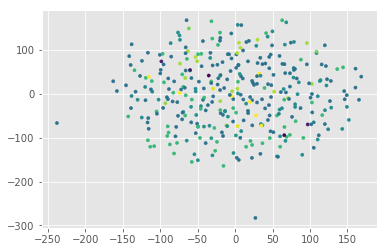

In [256]:
embedding_graph(X, y_predict)

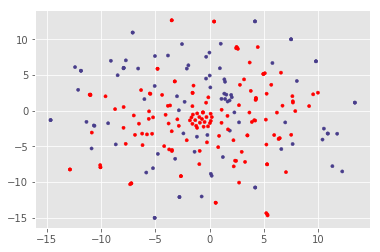

In [17]:
embedding_graph(X, labels)

### abstract glove

In [18]:
abstract2vec = text2vec(filename='abstract_all.tsv', class_name='abstract', model='glove', n_dim=100)

In [19]:
X = abstract2vec.train_glove()
y_predict = predict(X)

In [20]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [25]:
accuracy(y_predict, labels)

0.5358649789029536

In [26]:
abstract_X = X

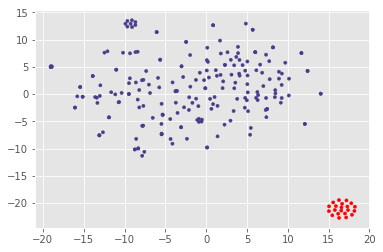

In [27]:
embedding_graph(X, y_predict)

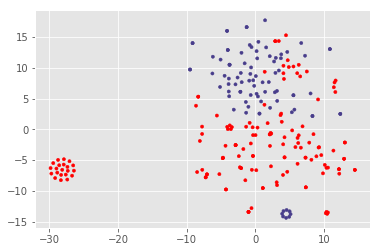

In [28]:
embedding_graph(X, labels)